## LSTM On the Merged Data - Final Attempt at finding patterns 

In [2]:
# Imports 
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Final_Merged_Data.csv", index_col=0)

In [4]:
features = df[["Average Sentiment", "Normalised Average Price"]]

In [6]:
# Create Sequences 
def create_sequences(data, sequence_length):
    X, y = [], [] 
    for i in range(len(data) - sequence_length): 
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 1]) # Normalised Average 
    return np.array(X), np.array(y) 

sequence_length = 10 

X,y = create_sequences(features.values, sequence_length) 

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train = X_train.astype('float32')  # Convert to float32

# Build LSTM Model 
model = Sequential() 
model.add(LSTM(50, input_shape=(sequence_length, 2), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Hyperparameter Tuning
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Checkpoint 
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# Early Stopping 
early_stopping = EarlyStopping(patience=10, restore_best_weights=True) 

In [7]:
# Train The Model 
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 0.2791 - val_loss: 0.1903
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1126 - val_loss: 0.0605
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0358 - val_loss: 0.0305
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0429 - val_loss: 0.0403
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0523 - val_loss: 0.0291
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0339 - val_loss: 0.0264
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0243 - val_loss: 0.0355
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: 0.0428
Epoch 9/100


/Users/bhuwanbansal/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0399
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0250 - val_loss: 0.0260
Epoch 11/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.0192
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0195 - val_loss: 0.0195
Epoch 13/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0217 - val_loss: 0.0181
Epoch 14/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0189
Epoch 15/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.0246
Epoch 16/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.0259
Epoch 17/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0208
Epoch 18/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0140 - val_loss: 0.0164
Epoch 19/100
3/3 [===========

In [13]:
# Evaluate the Model
predictions = model.predict(X_test)
mse = np.mean((predictions - y_test)**2)
print(f"Mean Squared Error: {mse}")

2/2 [==============================] - 0s 2ms/step
Mean Squared Error: 0.0943564943423256


1/1 [==============================] - 0s 11ms/step


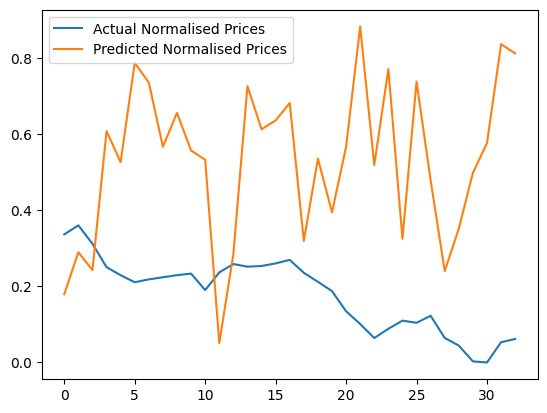

In [14]:
# Load the best model (optional) 
model.load_weights("best_model.h5")

# Make Predictions
last_sequence = X[-1]
prediction = model.predict(np.array([last_sequence]))[0][0]

# Visualize Results
actual_prices = df['Normalised Average Price'].values
plt.plot(actual_prices[-len(predictions):], label='Actual Normalised Prices')
plt.plot(predictions, label='Predicted Normalised Prices')
plt.legend()
plt.show()